Model Accuracy: 0.9996937422726311


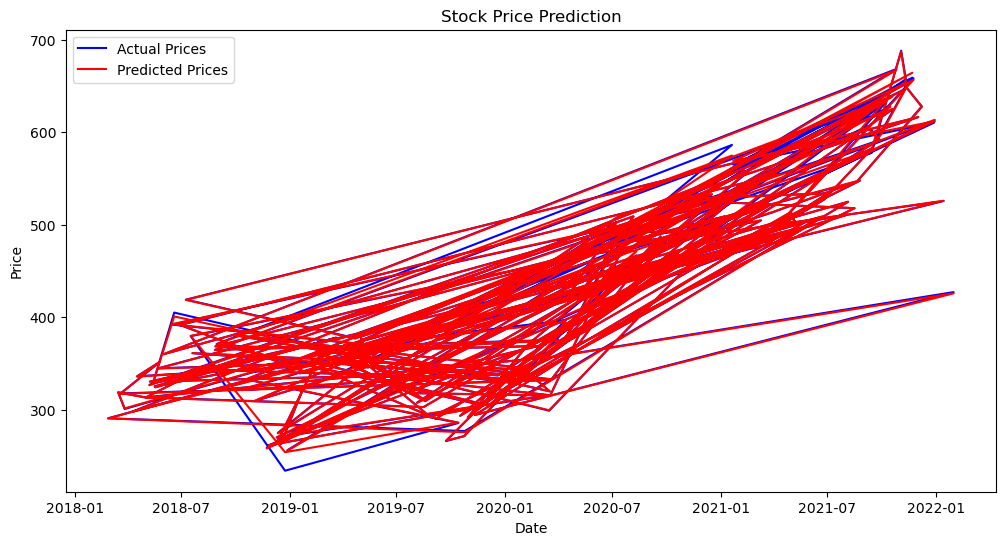

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load dataset
def load_data(filename):
    return pd.read_csv(filename)

# Preprocess data
def preprocess_data(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    return data

# Feature engineering
def create_features(data, window_size):
    for i in range(1, window_size+1):
        data[f'lag_{i}'] = data['Close'].shift(i)
    return data.dropna()

# Train model
def train_model(X_train, y_train):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

# Evaluate model
def evaluate_model(model, X_test, y_test):
    accuracy = model.score(X_test, y_test)
    print("Model Accuracy:", accuracy)

# Predict stock prices
def predict_prices(model, X_test):
    return model.predict(X_test)

# Visualize predictions
def visualize_predictions(predictions, actual):
    plt.figure(figsize=(12, 6))
    plt.plot(actual.index, actual.values, label='Actual Prices', color='blue')
    plt.plot(actual.index, predictions, label='Predicted Prices', color='red')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Stock Price Prediction')
    plt.legend()
    plt.show()

# Main function
def main():
    # Load and preprocess data
    data = load_data('stock_prices.csv')
    data = preprocess_data(data)
    
    # Define window size for feature engineering
    window_size = 5
    
    # Create features
    data = create_features(data, window_size)
    
    # Split data into features and target variable
    X = data.drop('Close', axis=1)
    y = data['Close']
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the model
    model = train_model(X_train, y_train)
    
    # Evaluate the model
    evaluate_model(model, X_test, y_test)
    
    # Make predictions
    predictions = predict_prices(model, X_test)
    
    # Visualize predictions
    visualize_predictions(predictions, y_test)

if __name__ == "__main__":
    main()